### Importing libraries

This section imports all libraries utilised within the programme

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.ticker as ticker
from ipywidgets import interact

from ipywidgets import widgets, interactive


# Importing necessary libraries for regression models
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing necessary libraries for splitting data and calculating metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from IPython.display import display, clear_output

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive

'''Global variables
    '''
gMethodDictionary = [('Linear Regression', linear_regression),
                    ('Decision Tree Regression', decision_tree_regression),
                    ('Random Forest Regression', random_forest_regression),
                    ('Ridge', ridge_regression), 
                    ('Lasso', perform_lasso),
                    ('Elastic Net', elastic_net_regression),
                    ('Support Vector Regression', perform_svr),
                    ('K-Nearest Neighbors Regression', perform_knn)]
global gVarErrorDf
gVarErrorDf = pd.DataFrame(columns=[ 'Drop index','Predicted y', 'RMSE', 'R^2', 'MAE', 'RMSE %', 'R^2 %', 'MAE %'])
gVarNames = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength',' ']
gX_train_preprocessed = pd.DataFrame()
gX_test_preprocessed = pd.DataFrame()
gy_train = []
gy_test = []


### File importing and preprocessing data
This section imports all libraries utilised within the programme

In [11]:
def csv_import():
    #import data from the files
    dataset = pd.read_csv('Concrete_Data_Yeh_final.csv')

    #Data Preprocessing
    #format as a dataframe
    dataset = pd.DataFrame(dataset)
    #check for null values
    dataset.isnull().sum()
    #check for duplicates
    dataset.duplicated().sum()
    #check for data types
    dataset.dtypes

    y = dataset["csMPa"]
    X = dataset.drop("csMPa", axis=1)

    return X, y

Need to drop all NaN in y

In [12]:
def preprocessing(X,y):
    # Splitting the data into training and test sets
    global gX_train_preprocessed, gX_test_preprocessed
    global gy_train, gy_test    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a preprocessing pipeline that imputes missing values with the mean 
    # and scales features to have zero mean and unit variance.
    preprocessing_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    gX_train_preprocessed = pd.DataFrame(preprocessing_pipeline.fit_transform(X_train))
    gX_test_preprocessed = pd.DataFrame(preprocessing_pipeline.transform(X_test))
    gy_train = y_train
    gy_test = y_test

### Regression functions

This section defines functions for various regression models which are later compared to choose the most effective model.

The regression models included are:

1. **Linear Regression (`linear_regression`)**: This model assumes a linear relationship between the independent and dependent variables. It is simple and provides interpretable results.

2. **Decision Tree Regression (`decision_tree_regression`)**: This model uses a decision tree to predict the dependent variable based on the independent variables. It is a non-parametric method and can capture complex relationships.

3. **Random Forest Regression (`random_forest_regression`)**: This model uses a collection of decision trees to make predictions. It is robust to overfitting and can handle large datasets with many variables.

4. **Lasso Regression (`lasso_regression`)**: This model is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

5. **Elastic Net Regression (`elastic_net_regression`)**: This model combines the properties of both Ridge Regression and LASSO Regression. It works well on datasets with many features.

6. **Ridge Regression (`ridge_regression`)**: This model is a regularization method that uses L2 regularization to prevent overfitting.

7. **Support Vector Regression (`svr_regression`)**: This model uses the principles of Support Vector Machines for regression purposes. It works well for datasets with high dimensional space.

8. **K-Nearest Neighbors Regression (`knn_regression`)**: This model predicts the value for a new instance by calculating the mean of the 'k' closest instances in the training set.

Each function splits the data into a training set and a test set, fits the model to the training data, makes predictions on the test data, and calculates several metrics to evaluate the performance of the model. These metrics include the R2 score, the mean squared error, and the mean absolute error.

---

In [13]:
def linear_regression(X, y, z):

    """
    This function applies the Linear Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.
    
    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.
    """
    
   #Creating the Linear Regression model
    regressor = LinearRegression()

    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)

    return y_pred

In [14]:
def decision_tree_regression(X, y,z):
    """
    This function applies the Decision Tree Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.
    """
    # Creating the Decision Tree regressor
    regressor = DecisionTreeRegressor()

    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)
    return y_pred

In [35]:
def random_forest_regression(X, y, z):
    """
    This function applies the Random Forest Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.
    """
   
   
    # Creating the Random Forest Regressor
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)

    return regressor, y_pred

In [16]:
def perform_lasso(X, y,z, alpha=1.0, test_size=0.2, random_state=None):
    """
    Perform Lasso Regression on the given data.

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Training data

    y : array-like of shape (n_samples,)
        Target values
        
    z : (numpy.ndarray or pandas.DataFrame):
        The X_test_ data used to predict the y_pred values.

    alpha : float, optional (default=1.0)
        Constant that multiplies the L1 term. Defaults to 1.0.

    test_size : float, optional (default=0.2)
        Represents the proportion of the dataset to include in the test split.

    random_state : int or RandomState instance, optional (default=None)
        Controls the shuffling applied to the data before applying the split.

    Returns:
    float
        Mean squared error of the Lasso model.
    """
    # Create and train the model
    model = Lasso(alpha=alpha)
    model.fit(X, y)

    # Make predictions and evaluate the model
    y_pred = model.predict(z)
    return y_pred

In [17]:
def elastic_net_regression(X, y,z):
    """
    This function applies the Elastic Net Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.
    """

    # Creating the Elastic Net Regressor
    regressor = ElasticNet(random_state = 0)

    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)

    return y_pred

In [18]:
def ridge_regression(X, y,z):
    """
    This function applies the Ridge Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.
    
    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.

    Prints:
    R2 Score: The coefficient of determination, a statistical measure of how well the regression predictions approximate the real data points.
    Mean Squared Error: The average squared difference between the estimated values and the actual value.
    Mean Absolute Error: The average absolute difference between the estimated values and the actual value.
    """
    
    # Creating the Ridge Regressor
    regressor = Ridge(random_state = 0)

    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)

    return y_pred

In [19]:
def perform_svr(X, y,z, kernel='rbf', C=1.0, epsilon=0.1, test_size=0.2, random_state=None):
    """
    Perform Support Vector Regression (SVR) on the given data.

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Training data

    y : array-like of shape (n_samples,)
        Target values

    z : (numpy.ndarray or pandas.DataFrame)
        The X_test_ data used to predict the y_pred values.

    kernel : string, optional (default='rbf')
        Specifies the kernel type to be used in the algorithm.
        It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable.

    C : float, optional (default=1.0)
        Regularization parameter. The strength of the regularization is inversely proportional to C.
        Must be strictly positive.

    epsilon : float, optional (default=0.1)
        Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

    test_size : float, optional (default=0.2)
        Represents the proportion of the dataset to include in the test split.

    random_state : int or RandomState instance, optional (default=None)
        Controls the shuffling applied to the data before applying the split.

    Returns:
    float
        Mean squared error of the SVR model.
    """
    # Create and train the model
    model = SVR(kernel=kernel, C=C, epsilon=epsilon)
    model.fit(X, y)

    # Make predictions and evaluate the model
    y_pred = model.predict(z)
    return y_pred

In [20]:
def perform_knn(X, y,z, n_neighbors=5, test_size=0.2, random_state=None):
    """
    Perform K-Nearest Neighbors Regression on the given data.

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Training data

    y : array-like of shape (n_samples,)
        Target values

    z : (numpy.ndarray or pandas.DataFrame)
        The X_test_ data used to predict the y_pred values.

    n_neighbors : int, optional (default=5)
        Number of neighbors to use by default for kneighbors queries.

    test_size : float, optional (default=0.2)
        Represents the proportion of the dataset to include in the test split.

    random_state : int or RandomState instance, optional (default=None)
        Controls the shuffling applied to the data before applying the split.

    Returns:
    float
        Mean squared error of the KNN model.
    """

    # Create and train the model
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X, y)

    # Make predictions and evaluate the model
    y_pred = model.predict(z)
    return y_pred

### Model Evaluation

This section analyses the performance of each regression model to determine which technique most accuratley predicts compressive strength
    
    
    

### Model Predictions    
    

In [21]:
'''print(gy_train.shape)
print(gX_train_preprocessed.shape)

y_= random_forest_regression(gX_train_preprocessed, gy_train, gX_test_preprocessed)
plt.scatter(y_, gy_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Random Forest Regression")
#add a trendline
z = np.polyfit(y_, gy_test, 1)
p = np.poly1d(z)
plt.plot(y_,p(y_), color='red')

plt.show()'''

'print(gy_train.shape)\nprint(gX_train_preprocessed.shape)\n\ny_= random_forest_regression(gX_train_preprocessed, gy_train, gX_test_preprocessed)\nplt.scatter(y_, gy_test)\nplt.xlabel("Predicted values")\nplt.ylabel("Actual values")\nplt.title("Random Forest Regression")\n#add a trendline\nz = np.polyfit(y_, gy_test, 1)\np = np.poly1d(z)\nplt.plot(y_,p(y_), color=\'red\')\n\nplt.show()'

In [22]:
def regression_performance():
    
    """
    This function evaluates the performance of various regression models on the preprocessed training and testing data.

    The function loops over each model in the global `gMethodDictionary`, predicts the target variable for the 
    testing data, and calculates the root mean squared error (RMSE), R^2 score, and mean absolute error (MAE) 
    for the predictions. The results are stored in a DataFrame.

    The function then ranks each model based on each performance metric, with the highest R^2 score and the lowest 
    RMSE and MAE being the best. It calculates a rank sum for each model and identifies the model with the lowest 
    rank sum as the best model.

    Parameters:
    None

    Returns:
    best_model (str): The name of the best model.
    df (pd.DataFrame): A DataFrame containing the performance metrics and ranks for each model.
    """

    data = []

    # Loop over each model
    for model_name, model in gMethodDictionary:
        # Predict values for y using X_test_preprocessed       
        y_pred = model(gX_train_preprocessed, gy_train, gX_test_preprocessed)

        # Calculate RMSE and R^2 score
        rmse = sqrt(mean_squared_error(gy_test, y_pred))
        r2 = r2_score(gy_test, y_pred)
        MAE = mean_absolute_error(gy_test, y_pred)

        # Append the data to the list
        data.append([model_name, y_pred, rmse, r2, MAE])

    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=['Model', 'y_pred', 'RMSE', 'R^2','MAE'])

    # Set the model names as the index
    df.set_index('Model', inplace=True)

    # Display the DataFrame
    # Rank each metric, with the highest being the best for R^2 and the lowest being the best for RMSE and MAE
    df['R^2_rank'] = df['R^2'].rank(ascending=False)
    df['RMSE_rank'] = df['RMSE'].rank()
    df['MAE_rank'] = df['MAE'].rank()

    # Calculate the sum of the ranks
    df['rank_sum'] = df['R^2_rank'] + df['RMSE_rank'] + df['MAE_rank']

    # Find the model with the lowest rank sum
    best_model = df['rank_sum'].idxmin()

    # Print the best model
    return (best_model), df

In [23]:
def var_drop(dropVar):
    """
    Drops columns from the training and testing datasets based on a binary number.

    Each digit in the binary number corresponds to a column in the datasets. If the digit is 1, the corresponding column is dropped. If the digit is 0, the corresponding column is kept.

    Parameters:
    dropVar (int): A binary number where each digit represents a column in the datasets.

    Returns:
    pandas.DataFrame: The modified training dataset with specified columns dropped. Only the first two rows are returned for brevity.
    """


    # Convert the binary number to a list of booleans
    bool_list = [bool(int(x)) for x in format(dropVar, '0{}b'.format(len(gX_train_preprocessed.columns)))]

    # Create a list of column names to drop based on the boolean list
    columns_to_drop_train = gX_train_preprocessed.columns[bool_list]
    columns_to_drop_test = gX_test_preprocessed.columns[bool_list]

    # Drop the columns
    datasetTrain_drop = gX_train_preprocessed.drop(columns_to_drop_train, axis=1)
    datasetTest_drop = gX_test_preprocessed.drop(columns_to_drop_test, axis=1)

    return datasetTrain_drop, datasetTest_drop

In [24]:
def var_performance():

    """
    This function evaluates the performance of the best regression model when each variable is dropped one by one.

    The function first identifies the best regression model by calling the `regression_performance` function. 
    It then loops over all variables in the preprocessed training and testing data, dropping one variable at a time 
    and evaluating the performance of the model without that variable. The performance is measured in terms of 
    root mean squared error (RMSE), R^2 score, and mean absolute error (MAE). 

    The function also calculates the variation of each performance metric compared to the base case (i.e., when no 
    variables are dropped). The results are stored in the global DataFrame `gVarErrorDf`.

    Parameters:    None
    Returns:    None
    """
    x_train_drop = gX_train_preprocessed
    x_test_drop = gX_test_preprocessed
    best_model = regression_performance()

    print("Looking for best model",best_model)
    for key, model_function in gMethodDictionary:
        if key == best_model:
            break

    for i in range(254):
        x_train_drop, x_test_drop = var_drop(i)
        
        y_pred = model_function(x_train_drop, gy_train, x_test_drop)
        rms_error = sqrt(mean_squared_error(gy_test, y_pred))
        r2_error = r2_score(gy_test, y_pred)
        ma_error = mean_absolute_error(gy_test, y_pred)
        if i == 0:
            rms_var = 1
            r2_var = 1
            ma_var = 1
            rms_base = rms_error
            r2_base = r2_error
            ma_base = ma_error

        else:
            rms_var = rms_error / rms_base
            r2_var = r2_error / r2_base
            ma_var = ma_error / ma_base


        gVarErrorDf.loc[i] = [bin(i), y_pred, rms_error, r2_error, ma_error, rms_var, r2_var, ma_var]

In [25]:
def var_impact_pct():

    """
    This function calculates the impact of each variable on the model's performance metrics (RMSE, R^2, and MAE) 
    when the variable is dropped. It creates a DataFrame that contains the performance metrics for each variable 
    when it's dropped, as well as when no variables are dropped. It also calculates the impact of dropping two 
    variables at a time. 

    The function then ranks each model (i.e., each set of dropped variables) based on the performance metrics, 
    calculates a rank sum for each model, and sorts the DataFrame by the rank sum. The model with the lowest rank 
    sum is considered the best model.

    The DataFrame is printed to the console and also exported to an Excel file named 'impact_df.xlsx'.

    Parameters:    None

    Returns:    None
    """

    impact_df = pd.DataFrame(columns=['Dropped variable: 1','Dropped variable : 2', 'RMSE', 'R^2', 'MAE','RMSE %', 'R^2 %', 'MAE %', ])

    #Single var impact
    for i in range(8):
        index = 2**i
        impact_df.loc[i] = [gVarNames[(7-i)],gVarNames[9], gVarErrorDf.loc[index]['RMSE'], gVarErrorDf.loc[index]['R^2'], gVarErrorDf.loc[index]['MAE'], gVarErrorDf.loc[index]['RMSE %'], gVarErrorDf.loc[index]['R^2 %'], gVarErrorDf.loc[index]['MAE %']]
    #Data frame containing all single variable impacts
    
    impact_df.loc[8] = ["None dropped",'', gVarErrorDf.loc[0]['RMSE'], gVarErrorDf.loc[0]['R^2'], gVarErrorDf.loc[0]['MAE'], gVarErrorDf.loc[0]['RMSE %'], gVarErrorDf.loc[0]['R^2 %'], gVarErrorDf.loc[0]['MAE %']]
    #plot_as_bar(impact_df)  
    
    #double var impact
    l = 9
    for j in range(7):
        #loop from j+1 to 8
        for k in range(j+1,8):
            if j != k:
                index = 2**j + 2**k #7- index to move through gVarNames correctly
                impact_df.loc[l] = [gVarNames[(7-j)], gVarNames[(7-k)], gVarErrorDf.loc[index]['RMSE'], gVarErrorDf.loc[index]['R^2'], gVarErrorDf.loc[index]['MAE'], gVarErrorDf.loc[index]['RMSE %'], gVarErrorDf.loc[index]['R^2 %'], gVarErrorDf.loc[index]['MAE %']]
                l += 1
    #Data frame containing all double variable impacts'''
    
    impact_df['R^2_rank'] = impact_df['R^2'].rank(ascending=False)
    impact_df['RMSE_rank'] = impact_df['RMSE'].rank()
    impact_df['MAE_rank'] = impact_df['MAE'].rank()

    # Calculate the sum of the ranks
    impact_df['rank_sum'] = impact_df['R^2_rank'] + impact_df['RMSE_rank'] + impact_df['MAE_rank']

    # Find the model with the lowest rank sum
    best_model = impact_df['rank_sum'].idxmin()
    #sort the data frame
    impact_df.sort_values(by=['rank_sum'], inplace=True) #This shows that Cement, Age and Blast funrace slag are the most important variables for predicting concrete strength. Removing the other variables imporves the model performance.
    print(impact_df)
    #export to excel 
    impact_df.to_excel('impact_df.xlsx')

## Graph Functions

1. `comp_graph()`

    This function is used to compare two or more datasets. It takes as input the datasets to be compared and plots them on the same graph. This is useful for visualizing how different datasets relate to each other.

2. `var_effect_line()`

    The `var_effect_line()` function is used to visualize the effect of a variable on the outcome. It takes as input a variable and an outcome, and plots a line graph showing how changes in the variable affect the outcome. This is useful for understanding the relationship between a variable and the outcome.

3. `var_effect_bar()`

    The `var_effect_bar()` function is used to create a bar chart showing the effect on the various errors, of removing individual variables from the dataset


In [26]:
def comp_graph():
    """
    This function generates a comparative graph of actual vs predicted values for different regression models.

    The function calls the `regression_performance` function to get the best model and a DataFrame containing 
    the predictions of each model. It then creates a scatter plot for each model, comparing the actual and 
    predicted values. The scatter plots are arranged in a grid, with one subplot for each model. Unused subplots 
    are removed.

    The function doesn't return anything. The graph is displayed using `plt.show()`.

    Note: This function relies on the global variable `gy_test` for the actual values. Make sure this variable 
    is defined and properly initialized before calling this function.
    """
    # Number of models taking the data from the data frame in the regression performance function
    best_model, df = regression_performance()
    n_models = len(df)

    # Create a figure and axes with a subplot for each model
    fig, axs = plt.subplots(2, 4, figsize=(15, 10))

    # Flatten the axes array
    axs = axs.flatten()

    # Loop over each model
    for i, (model_name, row) in enumerate(df.iterrows()):
        # Plot y_test vs y_pred
        axs[i].scatter(gy_test, row['y_pred'], s=10)
        axs[i].plot([gy_test.min(), gy_test.max()], [gy_test.min(), gy_test.max()], 'k--', lw=2)
        axs[i].set_xlabel('Actual')
        axs[i].set_ylabel('Predicted')
        axs[i].set_title(f'{model_name}')

    # Remove unused subplots
    for i in range(n_models, len(axs)):
        fig.delaxes(axs[i])

    # Display the plot
    plt.tight_layout()
    plt.show()

In [27]:
def var_effect_line():

    checkboxes = [widgets.Checkbox(value=True, description=var) for var in gVarNames]

    def update_lines(*args, **kwargs):
        clear_output(wait=True)
        sns.set_style("whitegrid")  
        
        fig, ax = plt.subplots(figsize=(10, 6))
        #add a fig title

        fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)  # Center the plot
        active_vars = [var.description for var in checkboxes if var.value]
        binary_string = ''.join(['1' if not checkbox.value else '0' for checkbox in checkboxes])
        print(f'Binary string: {binary_string}')
        binary_int = int(binary_string,2)
        x = gy_test
        y = gVarErrorDf.loc[(binary_int)].iloc[1]
        ax.scatter(x, y, label='Data')  # Add a label to the scatter plot
        
        # Fit a line to the data
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        
        # Add the line to the plot
        ax.plot(x, p(x), "r--", label='Trendline')  # Add a label to the trendline
        
        plt.xticks(fontsize=12)  # Increase the size of the x-axis labels
        plt.yticks(fontsize=12)  # Increase the size of the y-axis labels
        
        # Add title
        plt.title('Scatter plot of y_test vs gVarErrorDf', fontsize=16)  # Increase the size of the title

        plt.text(0.05, 0.95, f'R^2 = {gVarErrorDf.loc[binary_int].iloc[3]}, MAE = {gVarErrorDf.loc[binary_int].iloc[4]}, RMSE = {gVarErrorDf.loc[binary_int].iloc[2]}', transform=ax.transAxes, verticalalignment='top', fontsize=12)  # Increase the size of the text
        plt.legend()  # Add a legend
        #add a fig title
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        ax = plt.gca()
        ax.grid(False)
        plt.show()
        

    # Assuming you have 8 checkboxes
    grid = [
        [checkboxes[i] for i in range(j, j+4)]
        for j in range(0, 8, 4)
    ]

    grid = [[checkboxes[i] for i in range(j, j + 4)] for j in range(0, 8, 4)]
    ui = widgets.VBox([widgets.HBox(row) for row in grid])
    out = widgets.interactive_output(update_lines, {checkbox.description: checkbox for checkbox in checkboxes})

    display(ui, out)

In [28]:
def var_effect_bar():
    # List of binary variable names
    index = ['0b1', '0b10', '0b100', '0b1000', '0b10000', '0b100000', '0b1000000', '0b10000000', '0b100000000', '0b1000000000']

    # List of actual variable names
    global gVarNames

    # List of error types
    error_types = ['RMSE', 'R^2', 'MAE', 'RMSE %', 'R^2 %', 'MAE %']

    def plot_bar_chart(error_type):
        # Get the values for each variable from gVarErrorDf
        global gVarNames
        values = []
        for name in index:
            row = gVarErrorDf.loc[gVarErrorDf['Drop index'] == name, error_type]
            if len(row) > 0:
                values.append(row.values[0])
            else:
                values.append(np.nan)  # replace None with np.nan

        # Ensure gVarNames and values have the same length
        if len(gVarNames) != len(values):
            print(f"Length of gVarNames ({len(gVarNames)}) doesn't match length of values ({len(values)}). Adjusting lengths.")
            min_length = min(len(gVarNames), len(values))
            gVarNames = gVarNames[:min_length]
            values = values[:min_length]
        
        plt.bar(gVarNames, values)
        plt.title(f'Bar chart of {error_type} after removing variable')
        plt.xlabel('Variable', fontsize=14, labelpad=10)
        plt.ylabel(error_type, fontsize=14)

        # Add a constant line for the baseline (no variables removed)
        baseline = gVarErrorDf.loc[gVarErrorDf['Drop index'] == '0b0', error_type].values[0]
        plt.axhline(y=baseline, color='r', linestyle='--')

        plt.legend(['Baseline', 'Variable'])
        plt.xticks(rotation=90)
        #add minor tick marks
        ax = plt.gca()
        plt.grid(False)
        
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
        plt.show()

    # Create dropdown menu for error types
    interact(plot_bar_chart, error_type=error_types)

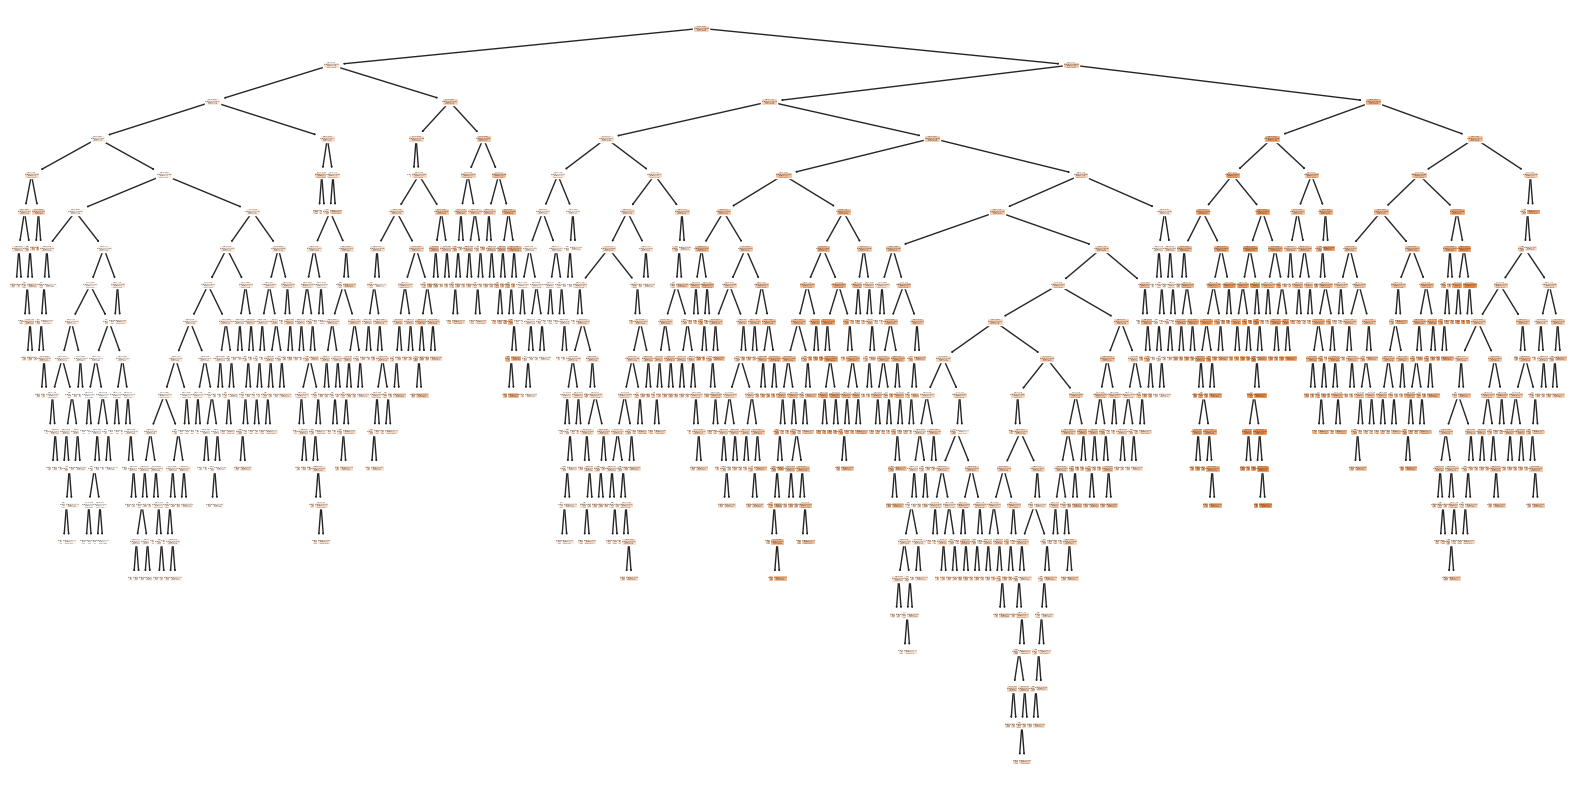

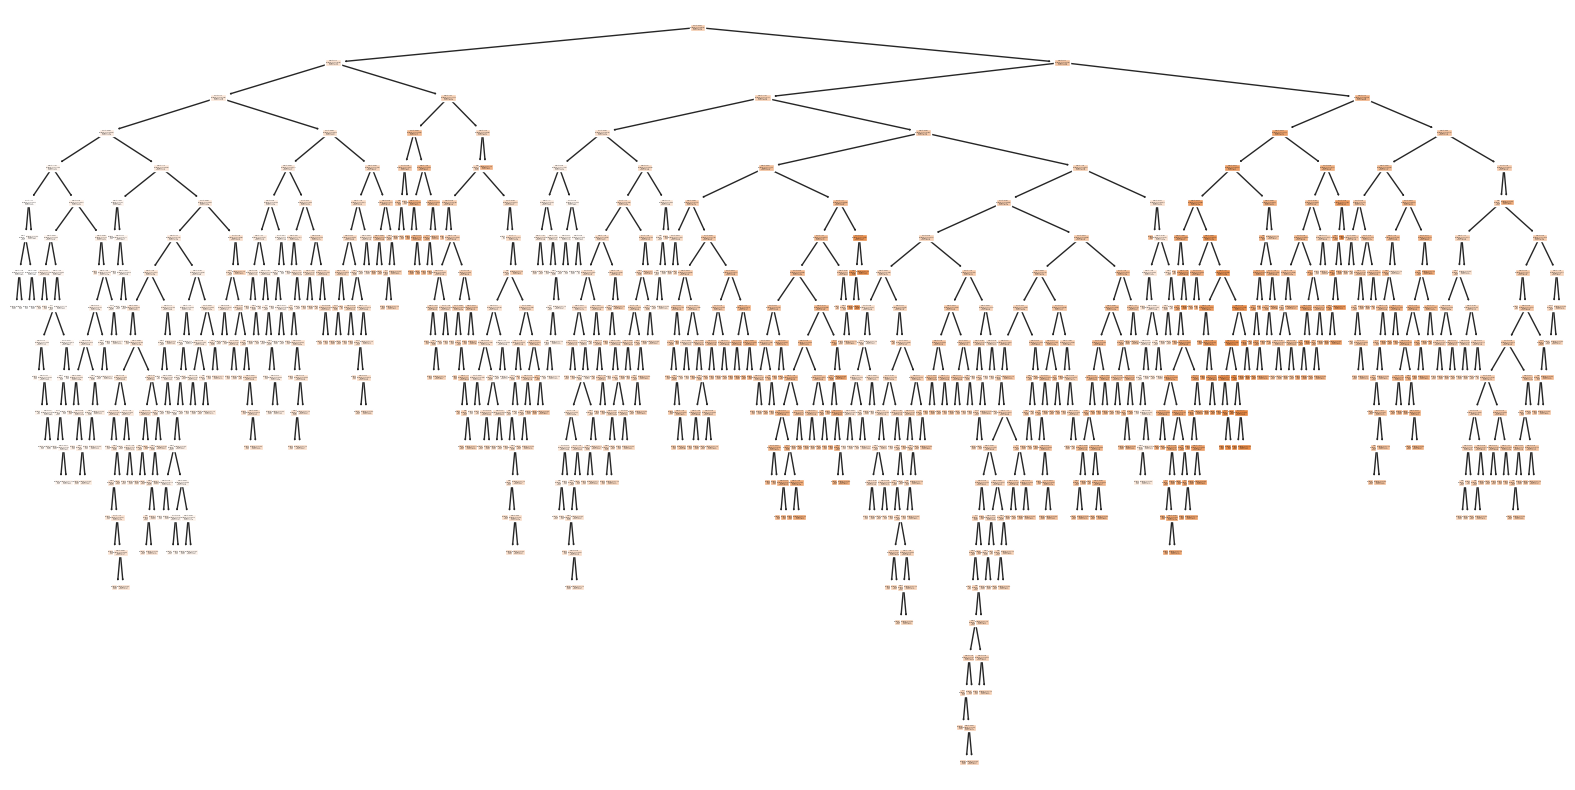

KeyboardInterrupt: 

In [37]:
def visualize_rf_trees(rf_model, num_trees=1):
    """
    This function visualizes the first 'num_trees' trees in a Random Forest model.

    Parameters:
    rf_model (sklearn.ensemble.RandomForestRegressor): The trained Random Forest model.
    num_trees (int): The number of trees to visualize. Default is 1.
    """
    for i in range(num_trees):
        plt.figure(figsize=(20,10))  # Set the figure size
        plot_tree(rf_model.estimators_[i], filled=True)  # Plot the i-th decision tree
        plt.show()

rf_model, y_pred = random_forest_regression(gX_train_preprocessed, gy_train, gX_test_preprocessed)
visualize_rf_trees(rf_model, num_trees=3)

Preprocessing done


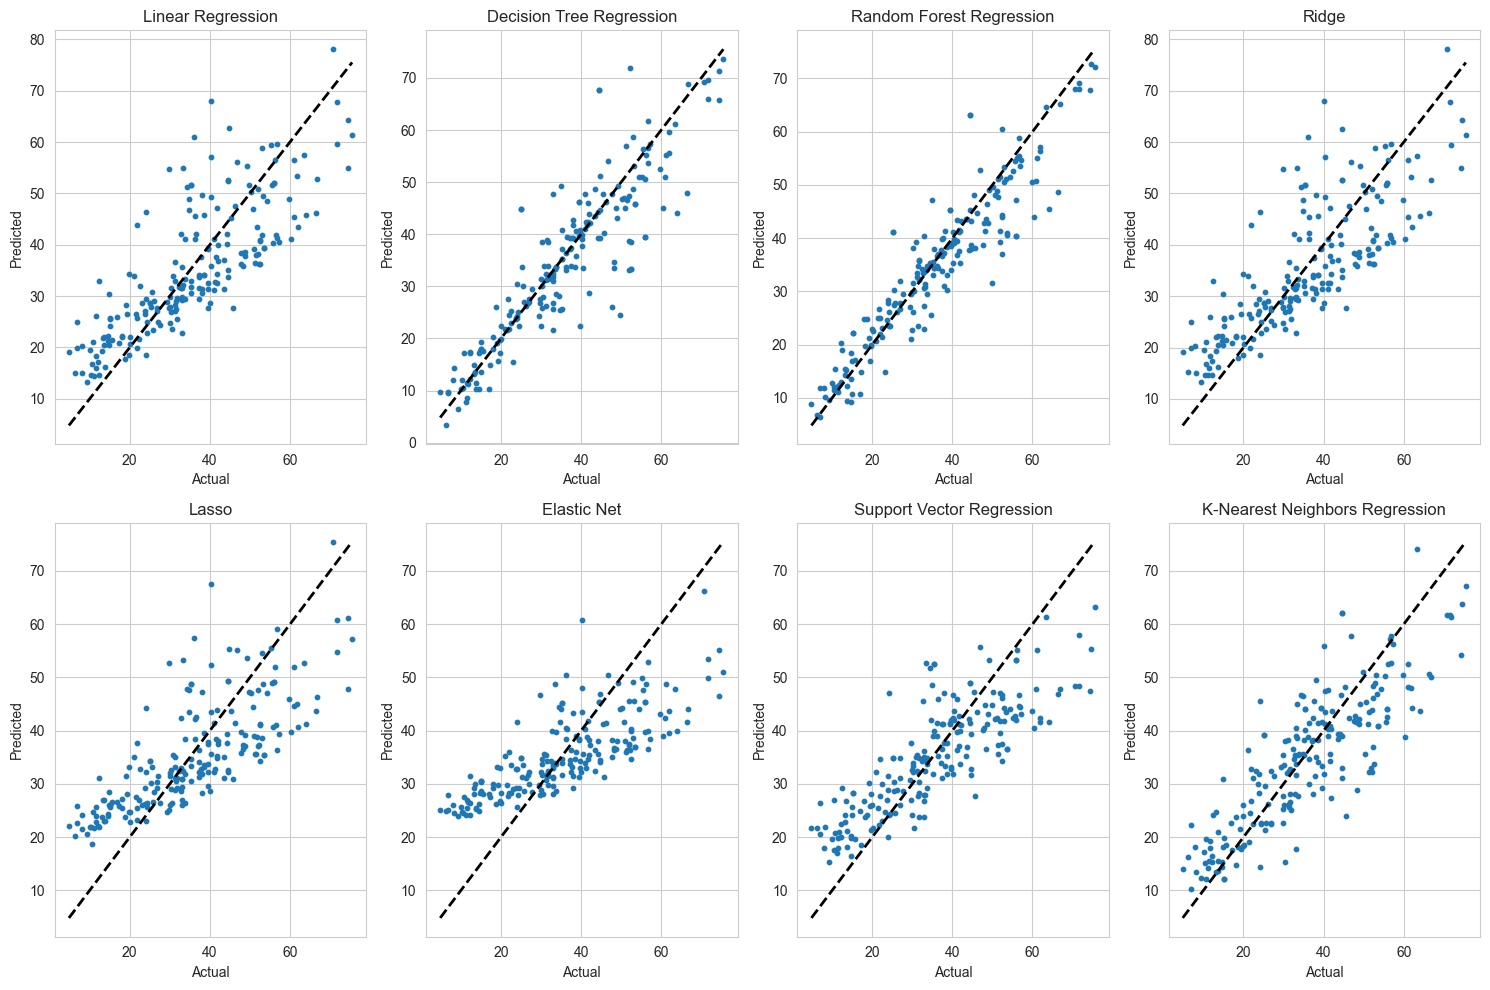

The best model is:  Random Forest Regression
Looking for best model ('Random Forest Regression',                                                                            y_pred  \
Model                                                                               
Linear Regression               [58.83067844173603, 52.10425472639661, 64.2772...   
Decision Tree Regression        [48.7, 39.4, 71.3, 35.3, 10.54, 44.28, 23.7, 4...   
Random Forest Regression        [50.58919999999996, 40.42360000000006, 72.7301...   
Ridge                           [58.82147520978634, 52.05343504212904, 64.2748...   
Lasso                           [54.62455468242719, 49.06649048822634, 61.2391...   
Elastic Net                     [49.1347262046903, 45.35831614408025, 55.14418...   
Support Vector Regression       [41.83374413708075, 53.36749277113666, 55.2966...   
K-Nearest Neighbors Regression  [49.010000000000005, 44.14, 63.838, 44.14, 12....   

                                     RMSE       R^2 

c:\Users\dougl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
c:\Users\dougl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
c:\Users\dougl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mean

     Drop index                                        Predicted y       RMSE  \
0           0b0  [49.010000000000005, 44.14, 63.838, 44.14, 12....   8.628065   
1           0b1  [48.736, 57.220000000000006, 69.55799999999999...  11.612946   
2          0b10  [47.246, 44.14, 65.0, 44.14, 9.42, 47.992, 29....   8.887511   
3          0b11  [46.874, 70.1, 65.0, 70.1, 9.42, 47.992, 29.80...  12.547161   
4         0b100  [49.010000000000005, 44.14, 63.838, 39.1200000...   8.444797   
..          ...                                                ...        ...   
249  0b11111001  [50.262, 70.22, 70.22, 70.22, 28.976, 41.686, ...  15.435952   
250  0b11111010  [49.596000000000004, 40.675999999999995, 67.02...  12.415518   
251  0b11111011  [43.128, 62.720000000000006, 62.72000000000000...  15.409955   
252  0b11111100  [49.596000000000004, 41.05400000000001, 67.020...  12.352601   
253  0b11111101  [51.378, 70.22, 70.22, 70.22, 21.8459999999999...  15.906987   

          R^2        MAE   

Output()

interactive(children=(Dropdown(description='error_type', options=('RMSE', 'R^2', 'MAE', 'RMSE %', 'R^2 %', 'MA…

In [30]:
def main():
    X,y = csv_import()
    preprocessing(X,y)
    print("Preprocessing done")
    comp_graph()
    best_model, df = regression_performance()
    print("The best model is: ", best_model)
    #hyperparameter 
    #var_performance
    var_performance()
    gVarErrorDf.to_csv('var_performance.csv')
    print (gVarErrorDf)
    var_impact_pct()
    #print("Var performance done") 
    var_effect_line() 
    var_effect_bar()
main()